## ***MODELO APLICADO PREDICCIÓN PRECIO DE VIVIENDAS A LA VENTA***

Tras aplicar los diferentes modelos, finalmente el que tras diferentes pruebas presenta los mejores valores de evaluación ha sido el modelo:
* Linear Regressor con Datos Escalados y sin Outliers<br>

Procedemos a aplicar el modelo a los datos y crearemos nuestro dataset final para su uso en la visualización de datos. A partir del mismo podremos sacar conclusiones de rentabilidad de viviendas a la venta e identificaremos oportunidades de inversión.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [95]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data = pd.read_csv(file_path, index_col = 0)

In [96]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


## ***Preprocesamiento - Datos escalados***

In [97]:
from sklearn.preprocessing import MinMaxScaler

aux1 =  data.drop('price',axis=1)
col_esc = aux1.columns.values

scale = MinMaxScaler()

data2 = data
data2[col_esc] = scale.fit_transform(data[col_esc])

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [99]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

In [100]:
def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

#### ***Definimos los datos de entrada y de salida.***

In [101]:
#definimos las variables den entrada y salida.
x = data2.drop('price',axis=1)
y = data2['price']

#### **División de datos en Train y Test**

In [102]:
#dividimos el conjunto
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [103]:
#definimos la instancia
lr = LinearRegression()

In [104]:
#Entrenamos los datos de prueba
lr.fit(x_train,y_train)

LinearRegression()

In [105]:
#metricas de evaluación
r2_train = lr.score(x_train,y_train)
r2_test = lr.score(x_test,y_test)

In [106]:
#aplicamos el modelo
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [107]:
MAE_train = error_absoluto_medio(y_train,y_train_pred)
    
MAE_test = error_absoluto_medio(y_test,y_test_pred)

r2_train,r2_test,MAE_train,MAE_test



final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.798389,0.724271,63002.46444,69757.293714


**Valores residuales**

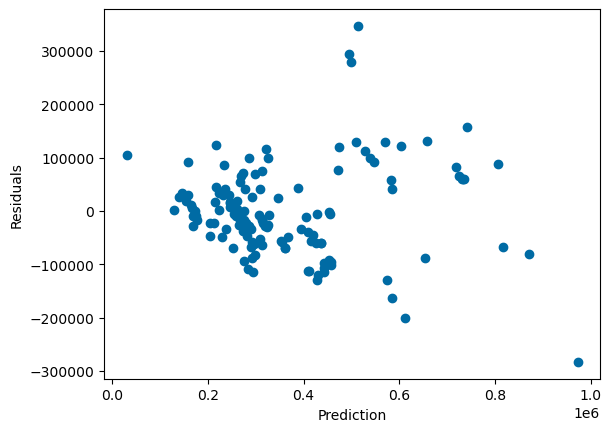

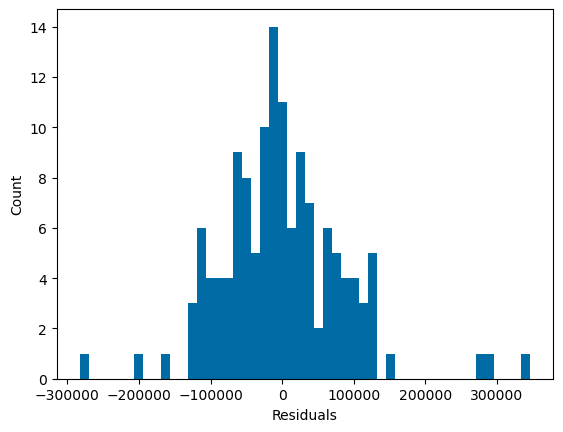

In [108]:
residuals = y_train - y_train_pred

# Gráfico de los residuos
plt.scatter(y_train_pred, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

# Verificación de la normalidad de los residuos
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

**Validación cruzada**<br>
Los resultados no son muy buenos, tenemos un accuracy muy bajo lo que indica que el modelo no está haciendo predicciones precisas. Además tenemos una variabilidad muy alta, nuestro modelo presenta underfiting.

In [109]:
from sklearn.model_selection import cross_val_score

# Ejecución de la validación cruzada con 10 folds
scores = cross_val_score(lr, x_train, y_train, cv=10)

# Imprimir la precisión promedio y la desviación estándar
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.45)


**Visualización de los resultados:**

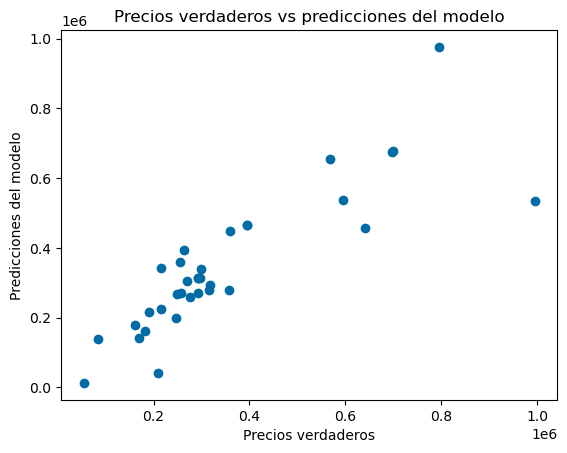

In [110]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Precios verdaderos")
plt.ylabel("Predicciones del modelo")
plt.title("Precios verdaderos vs predicciones del modelo")
plt.show()

Valores predichos que produjo el modelo en relación con cada característica:

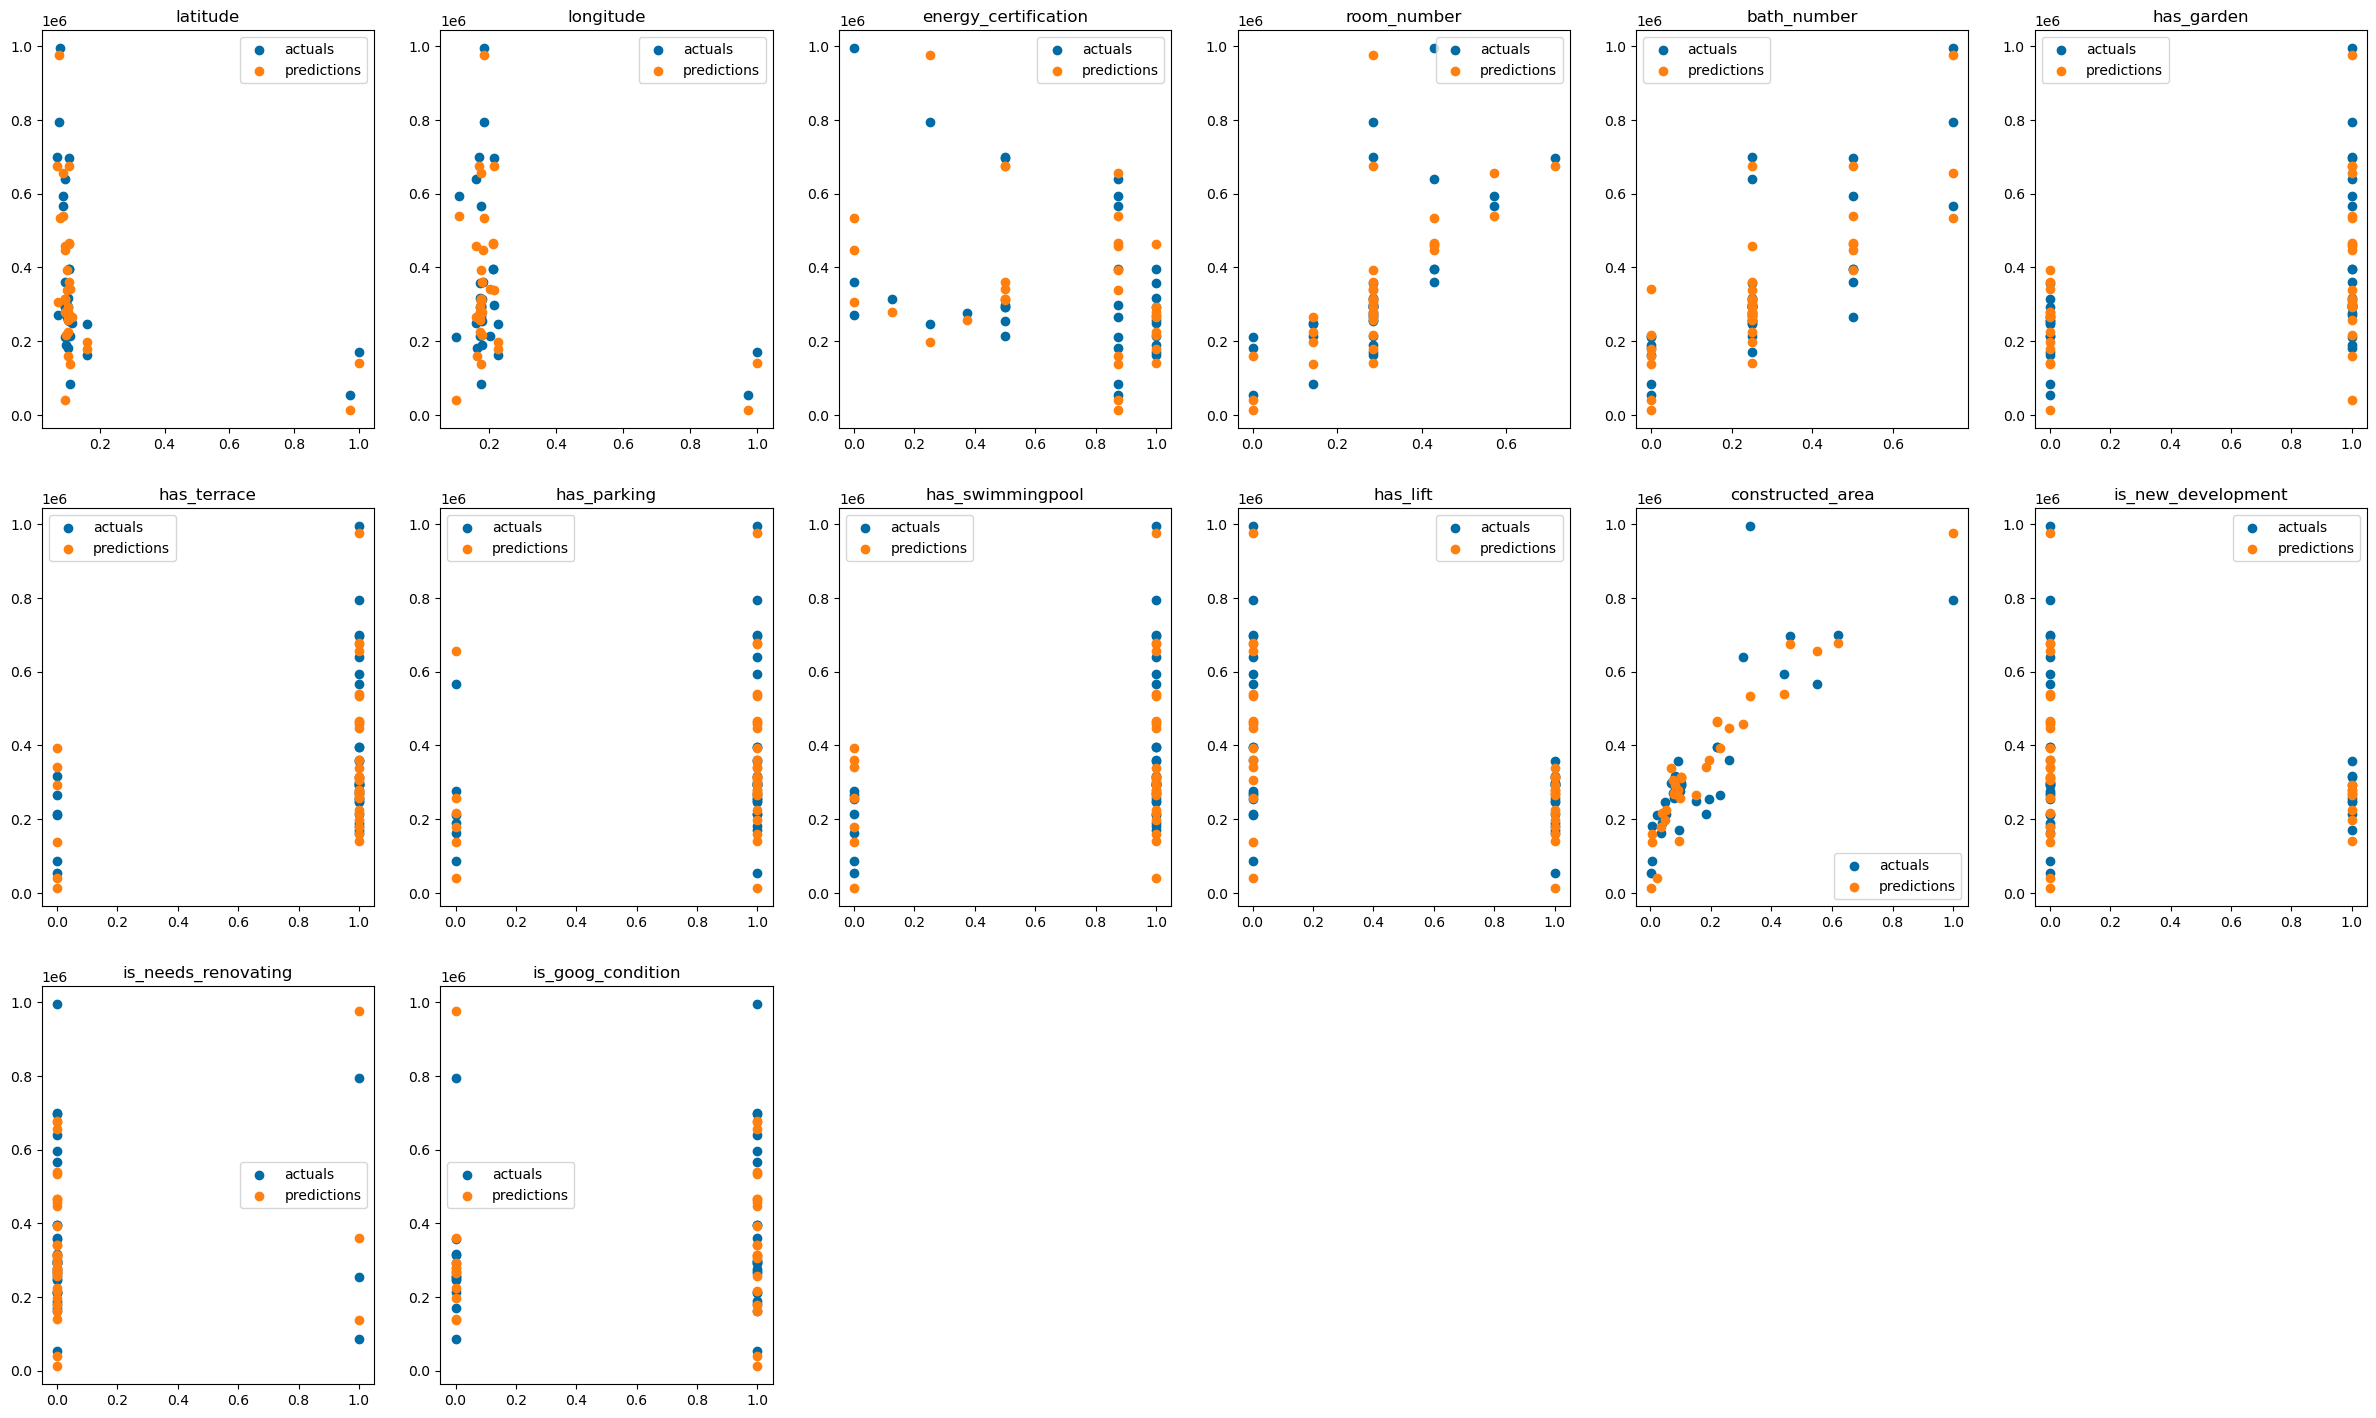

In [111]:
fig = plt.figure(figsize=(30,30))

columns = x_test.columns

for c, num in zip(columns, range(0,14)):
    ax = fig.add_subplot(5, 6, num+1)
    ax.scatter(x_test[c], y_test)
    ax.scatter(x_test[c], y_test_pred)
    ax.set_title(c)
    ax.legend(['actuals', 'predictions'])
    
plt.savefig('../graficas/variables_pred.png')
plt.show()

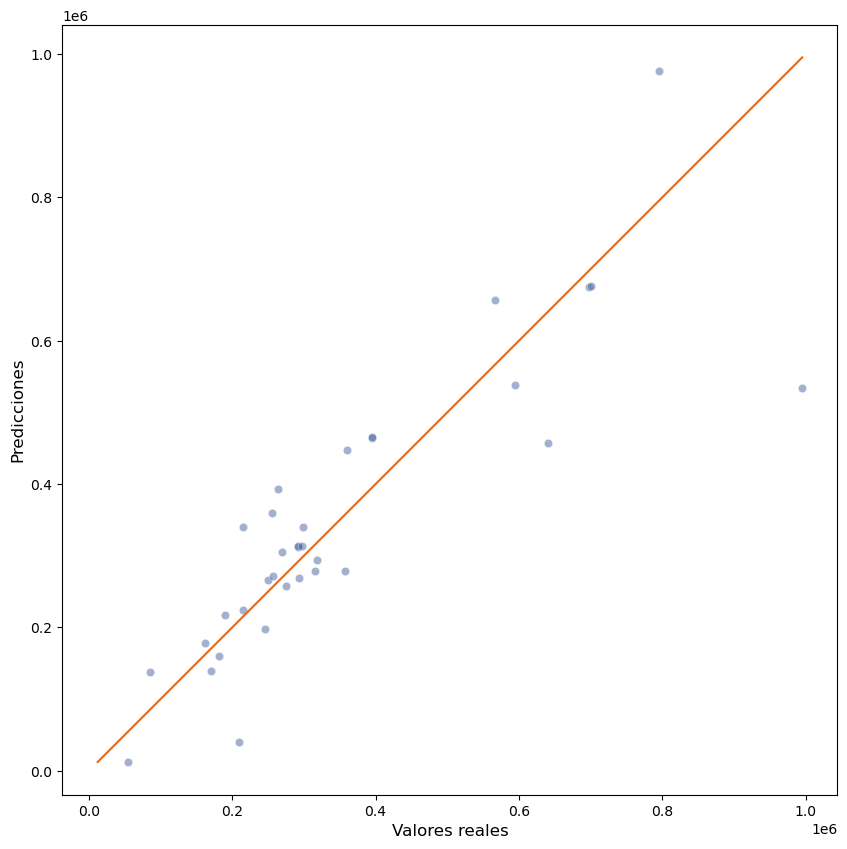

In [112]:
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(10,10))

sns.scatterplot(x=y_test, y=y_test_pred, color='#4863A0', alpha=0.5)

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
sns.lineplot(x=[p1, p2], y=[p1, p2], color='#E56717')

plt.xlabel('Valores reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.axis('equal')

plt.savefig('../graficas/modelo_pred.png')
plt.show()

A partir del gráfico de dispersión anterior de los valores reales frente a los previstos, es posible sacar las siguientes conclusiones:

* Cuanto más cerca estén los puntos de dispersión de la línea de regresión, mejor será el modelo. El R² obtenido fue de 0,8138, que es un puntaje relativamente aceptable. Esto da como resultado que todos los puntos estén cerca de la línea diagonal. 
* Si analizamos más a fondo los valores, podemos concluir que cuanto más alto es el precio de la vivienda, más disperso es el modelo. Esta afirmación puede deberse a la poca cantidad de datos para viviendas con precios superiores, por lo que era de esperar que el modelo ajustara mejor los precios de viviendas medias y no de lujo: superiores al millón de euros.

En cualquier caso, el rendimiento de nuestro modelo será más que aceptable ya que los puntos se ajustan a la recta de regresión y el valor de R² es cercano al 82% de efectividad.

In [113]:
y_test_pred

array([266085.81869714, 293627.07407932, 359634.49390521, 178084.43591663,
       538411.0293673 , 534508.49582838, 279423.87803381, 448135.89049533,
       224824.27116192, 217019.66258884, 139847.28036028, 464757.00082047,
       340022.42617552, 674248.0282685 , 340700.74985621, 312244.97181279,
       457105.23876392, 676594.77213598,  39735.82402778, 314290.06596258,
       465285.71992315, 160809.88039638, 392791.18894882, 197739.59287991,
       976336.73974331, 269198.40728487, 257543.40584012, 137500.43571479,
        12394.40693165, 656170.21768729, 271243.50143466, 314290.06596258,
       278210.02947539, 305600.67314297])

In [114]:
data_pred = lr.predict(x)

In [115]:
data['Price_predict'] = data_pred

In [116]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict
0,0.104634,0.212265,395000,0.875,0.428571,0.50,1.0,1.0,1.0,1.0,0.0,0.220859,0.0,0.0,1.0,465285.719923
1,0.099171,0.174626,640000,0.875,0.428571,0.25,1.0,1.0,1.0,1.0,0.0,0.398773,0.0,0.0,1.0,528456.075377
2,0.086396,0.175551,567000,0.875,0.571429,0.75,1.0,1.0,0.0,1.0,0.0,0.552147,0.0,0.0,1.0,656170.217687
3,0.113152,0.162179,375900,1.000,0.428571,0.25,1.0,1.0,1.0,1.0,1.0,0.285276,1.0,0.0,0.0,436368.692580
4,0.113152,0.162179,249900,1.000,0.142857,0.25,0.0,1.0,1.0,1.0,1.0,0.153374,1.0,0.0,0.0,266085.818697


In [117]:
data['Var_Prices'] = data['Price_predict'] - data['price'] 

In [118]:
data['%_rentabilidad'] = (data['Var_Prices']/data['price'])*100

Todos los datos en negativo son viviendas en las que su precio actual por las que están a la venta está por debajo del precio predicho por lo cual son una oportunidad de inversión 

In [119]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict,Var_Prices,%_rentabilidad
0,0.104634,0.212265,395000,0.875,0.428571,0.50,1.0,1.0,1.0,1.0,0.0,0.220859,0.0,0.0,1.0,465285.719923,70285.719923,17.793853
1,0.099171,0.174626,640000,0.875,0.428571,0.25,1.0,1.0,1.0,1.0,0.0,0.398773,0.0,0.0,1.0,528456.075377,-111543.924623,-17.428738
2,0.086396,0.175551,567000,0.875,0.571429,0.75,1.0,1.0,0.0,1.0,0.0,0.552147,0.0,0.0,1.0,656170.217687,89170.217687,15.726670
3,0.113152,0.162179,375900,1.000,0.428571,0.25,1.0,1.0,1.0,1.0,1.0,0.285276,1.0,0.0,0.0,436368.692580,60468.692580,16.086377
4,0.113152,0.162179,249900,1.000,0.142857,0.25,0.0,1.0,1.0,1.0,1.0,0.153374,1.0,0.0,0.0,266085.818697,16185.818697,6.476918


In [120]:
data.to_csv('../data/datos_finales_visualizacion).csv', index=False)